___

<center><h1>Análisis Posicionamiento Youtube</h1></center>

___

<center><h2>Pragma</h2></center><br>
<center> Assessment Consultor Cientifico de Datos </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presentado por:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>

<center>Mayo 2025</center>
<p></p>

In [1]:
# --- Common Modules ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# --- Data Preparation ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# --- Modelling ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction import DictVectorizer

# --- Testing and Evaluation ---
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV


## Introduction

The current project was developed following CRISP-DM workflow. Cross-Industry Standard Process for Data Mining (CRISP-DM) is the most commonly used methodology for analytics, data mining and analytics projects which provides an overview of the life cycle of a data mining project. CRISP-DM is a robust industry standard process which guides the analyst through a set of phases which cover all possible data mining situations.

## Business Understanding

The first phase is crucial to setting the project up for success by aligning the analysis with the business objectives. In this case, the problem revolves around the bank’s need to reduce customer churn by understanding key drivers behind why customers leave. With rising competition in the financial services industry, customer retention is more important than ever. The goal is to develop a predictive model that identifies customers at risk of churning, based on factors such as age, engagement, and financial behaviors. The optimal solution is a data-driven approach that empowers the bank to make informed decisions and implement retention strategies, using machine learning to predict churn and target high-risk customers with proactive interventions.

## Data Loading and Initial Exploration

In [2]:
categories_df = pd.read_json('../data/US_category_id.json')

# Category mapping process
category_mapping = dict(zip(
    categories_df['items'].apply(lambda x: int(x['id'])),
    categories_df['items'].apply(lambda x: x['snippet']['title'])
))

print("Available categories:")
for cat_id, cat_name in category_mapping.items():
    print(f"{cat_id}: {cat_name}")

Available categories:
1: Film & Animation
2: Autos & Vehicles
10: Music
15: Pets & Animals
17: Sports
18: Short Movies
19: Travel & Events
20: Gaming
21: Videoblogging
22: People & Blogs
23: Comedy
24: Entertainment
25: News & Politics
26: Howto & Style
27: Education
28: Science & Technology
29: Nonprofits & Activism
30: Movies
31: Anime/Animation
32: Action/Adventure
33: Classics
34: Comedy
35: Documentary
36: Drama
37: Family
38: Foreign
39: Horror
40: Sci-Fi/Fantasy
41: Thriller
42: Shorts
43: Shows
44: Trailers


In [3]:
# Load the main youtube data
df = pd.read_csv('../data/USvideos.csv')

print("Dataset shape:", df.shape)
display(df.head())

print("\nDataset info:")
df.info()

Dataset shape: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null 

In [4]:
# Add category names to the dataframe
df['category_name'] = df['category_id'].map(category_mapping)

# Display basic statistics
print("Summary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

Summary statistics:


,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06



Missing values per column:


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name               0
dtype: int64

In [5]:
display(df.head())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [6]:
# Display date range of the dataset
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
print(f"\nDate range: {df['trending_date'].min().strftime('%Y-%m-%d')} to {df['trending_date'].max().strftime('%Y-%m-%d')}")


Date range: 2017-11-14 to 2018-06-14


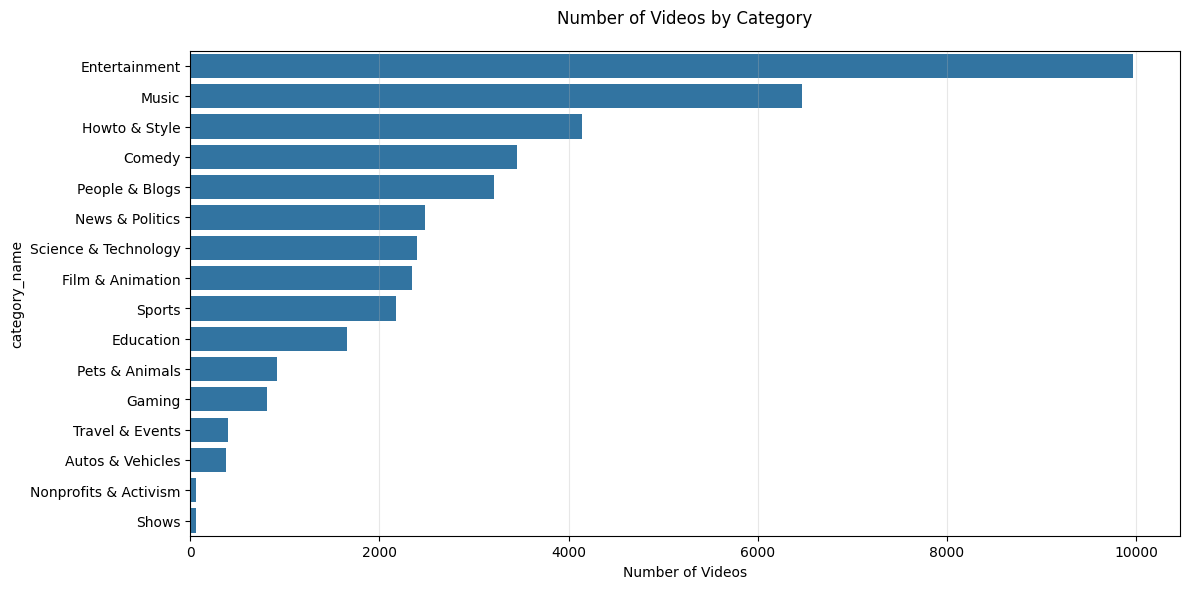


Videos per category:


category_name
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: count, dtype: int64

In [7]:
# Set up the plotting style
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# 1. Distribution of videos across categories
plt.figure(figsize=(12, 6))
category_counts = df['category_name'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Number of Videos by Category', pad=20)
plt.xlabel('Number of Videos')
plt.tight_layout()
plt.show()

# Display the exact counts
print("\nVideos per category:")
display(category_counts)

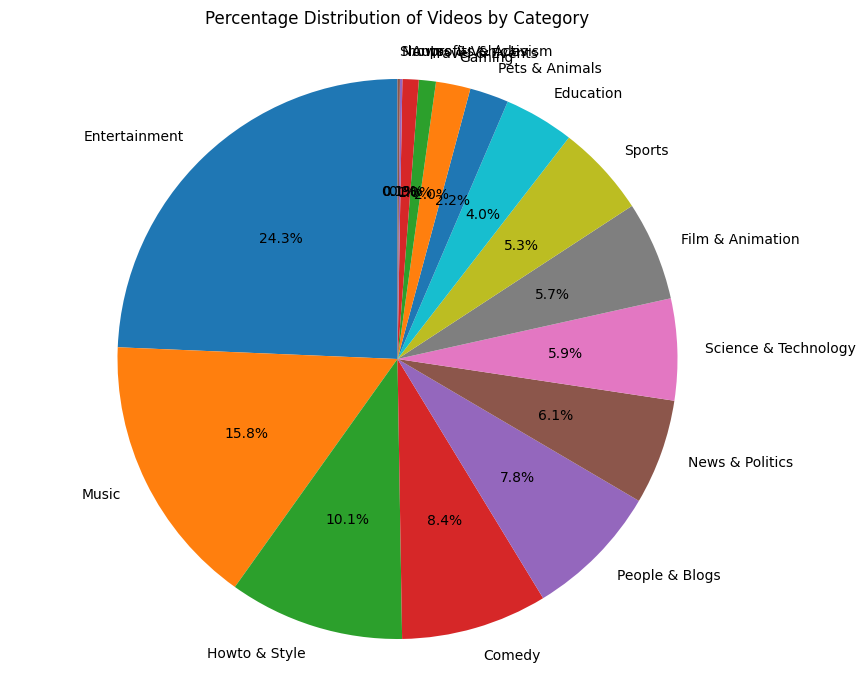


Percentage distribution per category:


category_name
Entertainment            24.3
Music                    15.8
Howto & Style            10.1
Comedy                    8.4
People & Blogs            7.8
News & Politics           6.1
Science & Technology      5.9
Film & Animation          5.7
Sports                    5.3
Education                 4.0
Pets & Animals            2.2
Gaming                    2.0
Travel & Events           1.0
Autos & Vehicles          0.9
Nonprofits & Activism     0.1
Shows                     0.1
Name: count, dtype: float64

In [8]:
# Create pie chart for category distribution
plt.figure(figsize=(10, 8))
category_counts = df['category_name'].value_counts()
plt.pie(category_counts, 
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Percentage Distribution of Videos by Category', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Display the exact percentages
print("\nPercentage distribution per category:")
display((category_counts / len(df) * 100).round(1))

## Cleaning and Data Preparation

In [11]:
# Missing values detection

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
display(missing_info[missing_info['Missing Values'] > 0])

,Missing Values,Percentage
description,570,1.391975


In [12]:
# missing values handling

df_clean = df.copy()
df_clean['description'] = df_clean['description'].fillna('')
display(df_clean.isnull().sum())

Missing values after cleaning:


video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_name             0
dtype: int64

In [14]:
# Format conversion
df_clean['trending_date'] = (
    pd.to_datetime(df_clean['trending_date'], format='%y.%d.%m')
    # if trending_date ever comes in with a tz, remove it too
    .dt.tz_localize(None)
)
df_clean['publish_time'] = (
    pd.to_datetime(df_clean['publish_time'])
    # drop any timezone info here
    .dt.tz_localize(None)
)

df_clean['publish_date'] = df_clean['publish_time'].dt.date
df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day'] = df_clean['publish_time'].dt.day_name()

# Calculate days until trending
df_clean['days_until_trending'] = (
    df_clean['trending_date'] - df_clean['publish_time']
).dt.days

display(df_clean.head())


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_date,publish_hour,publish_day,days_until_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,17,Monday,0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,2017-11-13,7,Monday,0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-12,19,Sunday,1
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2017-11-13,11,Monday,0
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017-11-12,18,Sunday,1


In [15]:
# Calculate the percentage of videos in each category
category_percentages = df_clean['category_name'].value_counts(normalize=True) * 100

# Get categories that have less than 2% of the data
small_categories = category_percentages[category_percentages < 2].index

# Replace small categories with 'Others' in the category_name column
df_clean['category_name'] = df_clean['category_name'].apply(
    lambda x: 'Others' if x in small_categories else x
)

# Display the new distribution
print("\nCategory distribution after grouping:")
print(df_clean['category_name'].value_counts(normalize=True) * 100)


Category distribution after grouping:
category_name
Entertainment           24.332707
Music                   15.805026
Howto & Style           10.124789
Comedy                   8.442209
People & Blogs           7.839019
News & Politics          6.073408
Science & Technology     5.863391
Film & Animation         5.726636
Sports                   5.309043
Others                   4.193021
Education                4.044055
Pets & Animals           2.246697
Name: proportion, dtype: float64


In [19]:
df_final = df_clean.copy()

In [28]:
# Aditional features creation
# Calculate engagement metrics
df_final['engagement_rate'] = (df_final['likes'] + df_final['comment_count']) / df_final['views'] * 100
df_final['like_ratio'] = df_final['likes'] / (df_final['likes'] + df_final['dislikes'])
df_final['positive_engagement_rate'] = ((df_final['likes']+df_final['comment_count']) / df_final['views']) * 100
df_final['weighted_engagement_score'] = (
    (df_final['likes'] * 1.0 + 
     df_final['comment_count'] * 2 - 
     df_final['dislikes'] * 1) / df_final['views']
) * 100


# Create time-based features
df_final['is_weekend'] = df_final['publish_time'].dt.dayofweek.isin([5, 6]).astype(int)
df_final['is_morning'] = ((df_final['publish_hour'] >= 5) & (df_final['publish_hour'] < 12)).astype(int)
df_final['is_afternoon'] = ((df_final['publish_hour'] >= 12) & (df_final['publish_hour'] < 17)).astype(int)
df_final['is_evening'] = ((df_final['publish_hour'] >= 17) & (df_final['publish_hour'] < 22)).astype(int)
df_final['is_night'] = ((df_final['publish_hour'] >= 22) | (df_final['publish_hour'] < 5)).astype(int)


In [29]:
display(df_final.head())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,days_until_trending,engagement_rate,like_ratio,positive_engagement_rate,weighted_engagement_score,is_weekend,is_morning,is_afternoon,is_evening,is_night
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,0,9.818754,0.950970,9.818754,11.554250,0,0,0,1,0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,0,4.543111,0.940521,4.543111,4.814198,0,1,0,0,0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,1,4.832122,0.964729,4.832122,4.921173,1,0,0,1,0
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,0,3.589496,0.938550,3.589496,4.020771,0,1,0,0,0
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,1,7.145621,0.985181,7.145621,7.886604,1,0,0,1,0


In [30]:
# Display final dataset information
print("Final Dataset Information:")
print("\nDataset Shape:")
print(df_final.shape)

print("\nData Types:")
print(df_final.dtypes)

print("\nSummary Statistics:")
display(df_final.describe())

# Save the cleaned dataset
df_final.to_csv('../data/cleaned_youtube_data.csv', index=False)

Final Dataset Information:

Dataset Shape:
(40949, 30)

Data Types:
video_id                             object
trending_date                datetime64[ns]
title                                object
channel_title                        object
category_id                           int64
publish_time                 datetime64[ns]
tags                                 object
views                                 int64
likes                                 int64
dislikes                              int64
comment_count                         int64
thumbnail_link                       object
comments_disabled                      bool
ratings_disabled                       bool
video_error_or_removed                 bool
description                          object
category_name                        object
publish_date                         object
publish_hour                          int32
publish_day                          object
days_until_trending                   int64
engageme

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,publish_hour,days_until_trending,engagement_rate,like_ratio,positive_engagement_rate,weighted_engagement_score,is_weekend,is_morning,is_afternoon,is_evening,is_night
count,40949,40949.000000,40949,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000,40779.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,2018-02-27 06:22:42.494810624,19.972429,2018-02-11 01:00:49.258589952,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,13.766685,15.811253,3.886605,0.933113,3.886605,4.170497,0.177587,0.128843,0.332487,0.310337,0.228333
min,2017-11-14 00:00:00,1.000000,2006-07-23 08:24:11,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000,0.000000,0.000000,-13.453266,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-01-04 00:00:00,17.000000,2017-12-27 21:00:00,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,10.000000,2.000000,1.772361,0.930331,1.772361,1.863932,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018-02-26 00:00:00,24.000000,2018-02-21 16:19:27,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,15.000000,4.000000,3.202224,0.966988,3.202224,3.392385,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018-04-24 00:00:00,25.000000,2018-04-16 17:20:26,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,18.000000,8.000000,5.195099,0.982790,5.195099,5.540725,0.000000,0.000000,1.000000,1.000000,0.000000
max,2018-06-14 00:00:00,43.000000,2018-06-14 01:31:53,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,23.000000,4214.000000,32.592810,1.000000,32.592810,35.706253,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,7.568327,NaN,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,6.424996,146.014236,2.991641,0.102317,2.991641,3.350611,0.382169,0.335030,0.471110,0.462637,0.419763


## Análisis Exploratorio (EDA)

In [33]:
# Metricas de engagement por Categoria

# Calculate median and mean for engagement metrics by category
engagement_metrics = ['engagement_rate', 'like_ratio', 'positive_engagement_rate', 'weighted_engagement_score']

# Calculate statistics
category_stats = df_final.groupby('category_name')[engagement_metrics].agg(['median', 'mean']).round(2)

# Display the results
print("Engagement Metrics by Category (Median and Mean):")
print(category_stats)


Engagement Metrics by Category (Median and Mean):
                     engagement_rate       like_ratio        \
                              median  mean     median  mean   
category_name                                                 
Comedy                          4.14  4.91       0.97  0.95   
Education                       4.02  4.23       0.97  0.96   
Entertainment                   2.59  3.24       0.96  0.92   
Film & Animation                2.60  3.10       0.96  0.93   
Howto & Style                   4.77  5.09       0.98  0.96   
Music                           4.25  5.14       0.98  0.96   
News & Politics                 1.36  1.91       0.86  0.79   
Others                          3.05  3.39       0.96  0.93   
People & Blogs                  3.88  4.66       0.97  0.94   
Pets & Animals                  3.39  3.75       0.98  0.97   
Science & Technology            3.00  3.47       0.96  0.94   
Sports                          1.38  1.79       0.95  0.91   

    

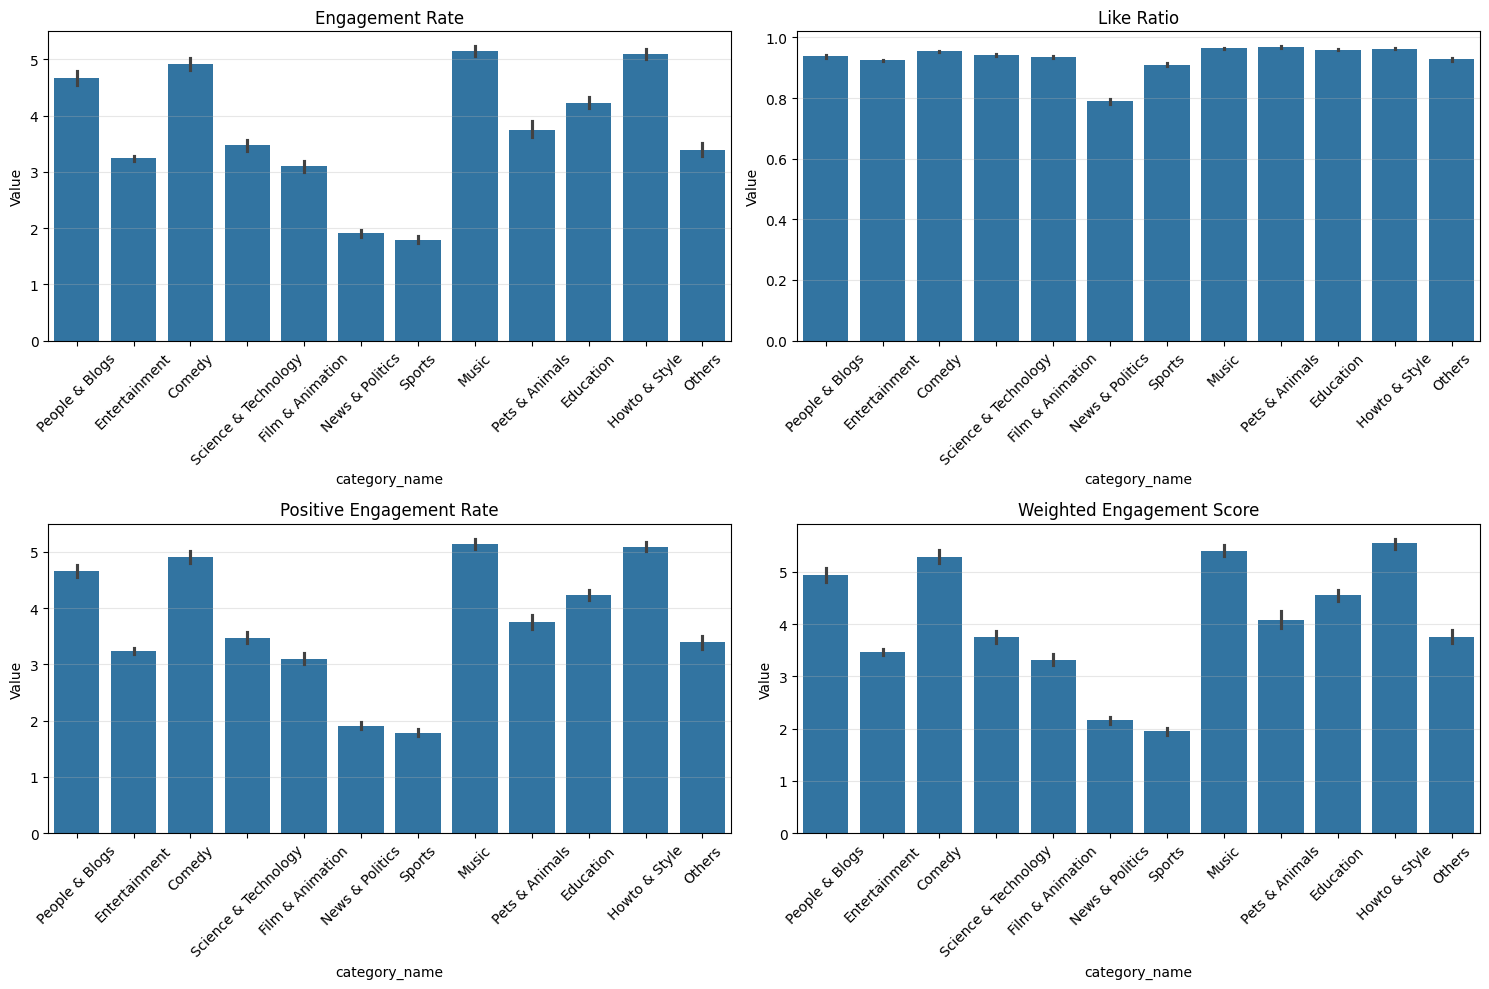

In [37]:
# Create a figure with subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Plot each metric
for idx, metric in enumerate(engagement_metrics):
    sns.barplot(data=df_final, x='category_name', y=metric, ax=axes[idx])
    axes[idx].set_title(f'{metric.replace("_", " ").title()}')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
# Outlier analysis - not usable for the models
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Function to detect outliers using IQR method
def detect_outliers(df_final, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Print outlier statistics
print("\nOutlier Statistics:")
for column in numerical_columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    print(f"\n{column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df_clean))*100:.2f}%")
    print(f"Lower bound: {lower_bound:,.0f}")
    print(f"Upper bound: {upper_bound:,.0f}")

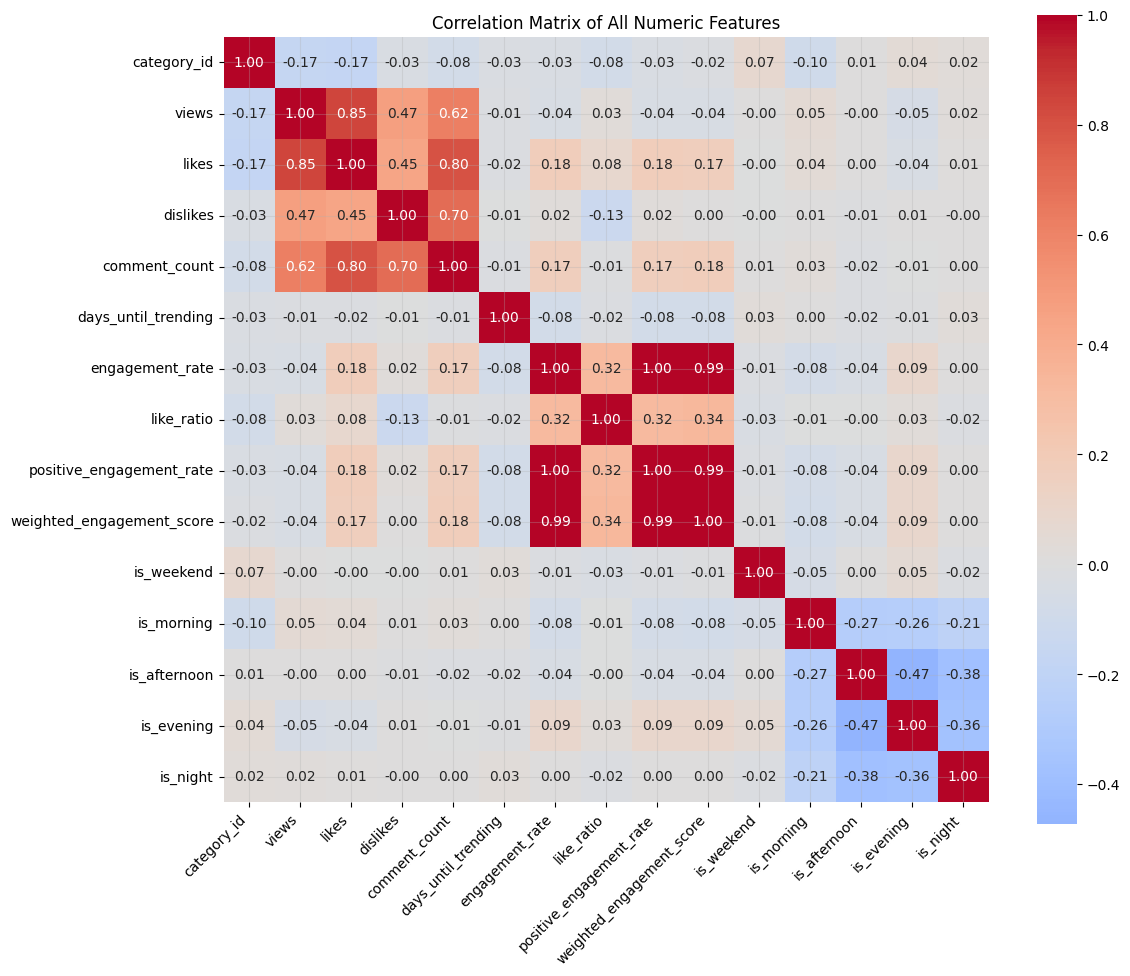


Correlation Matrix:


,category_id,views,likes,dislikes,comment_count,days_until_trending,engagement_rate,like_ratio,positive_engagement_rate,weighted_engagement_score,is_weekend,is_morning,is_afternoon,is_evening,is_night
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,-0.028635,-0.030818,-0.082000,-0.030818,-0.019501,0.074989,-0.095316,0.006229,0.041956,0.022844
views,-0.168231,1.000000,0.849177,0.472213,0.617621,-0.014429,-0.040872,0.026428,-0.040872,-0.044432,-0.000781,0.051159,-0.001080,-0.054472,0.020416
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.017652,0.176841,0.080572,0.176841,0.169030,-0.002799,0.044452,0.003375,-0.044917,0.010239
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.007056,0.016318,-0.127597,0.016318,0.000330,-0.001555,0.005930,-0.009597,0.006601,-0.001238
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.013256,0.165821,-0.011547,0.165821,0.176242,0.006135,0.028299,-0.016125,-0.006736,0.002934
days_until_trending,-0.028635,-0.014429,-0.017652,-0.007056,-0.013256,1.000000,-0.080400,-0.018790,-0.080400,-0.077140,0.031442,0.000997,-0.018239,-0.008263,0.028782
engagement_rate,-0.030818,-0.040872,0.176841,0.016318,0.165821,-0.080400,1.000000,0.319993,1.000000,0.989083,-0.013546,-0.075856,-0.036779,0.091480,0.000998
like_ratio,-0.082000,0.026428,0.080572,-0.127597,-0.011547,-0.018790,0.319993,1.000000,0.319993,0.337973,-0.033085,-0.005480,-0.001505,0.026079,-0.022654
positive_engagement_rate,-0.030818,-0.040872,0.176841,0.016318,0.165821,-0.080400,1.000000,0.319993,1.000000,0.989083,-0.013546,-0.075856,-0.036779,0.091480,0.000998
weighted_engagement_score,-0.019501,-0.044432,0.169030,0.000330,0.176242,-0.077140,0.989083,0.337973,0.989083,1.000000,-0.012071,-0.077681,-0.039528,0.093572,0.003235


In [40]:
# 3. Correlation between engagement metrics
# Get all numeric columns from the dataframe
numeric_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for all numeric features
correlation_matrix = df_final[numeric_columns].corr()

# Create a larger figure to accommodate more features
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format numbers to 2 decimal places
            square=True)  # Make the plot square-shaped

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix of All Numeric Features')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("\nCorrelation Matrix:")
display(correlation_matrix)

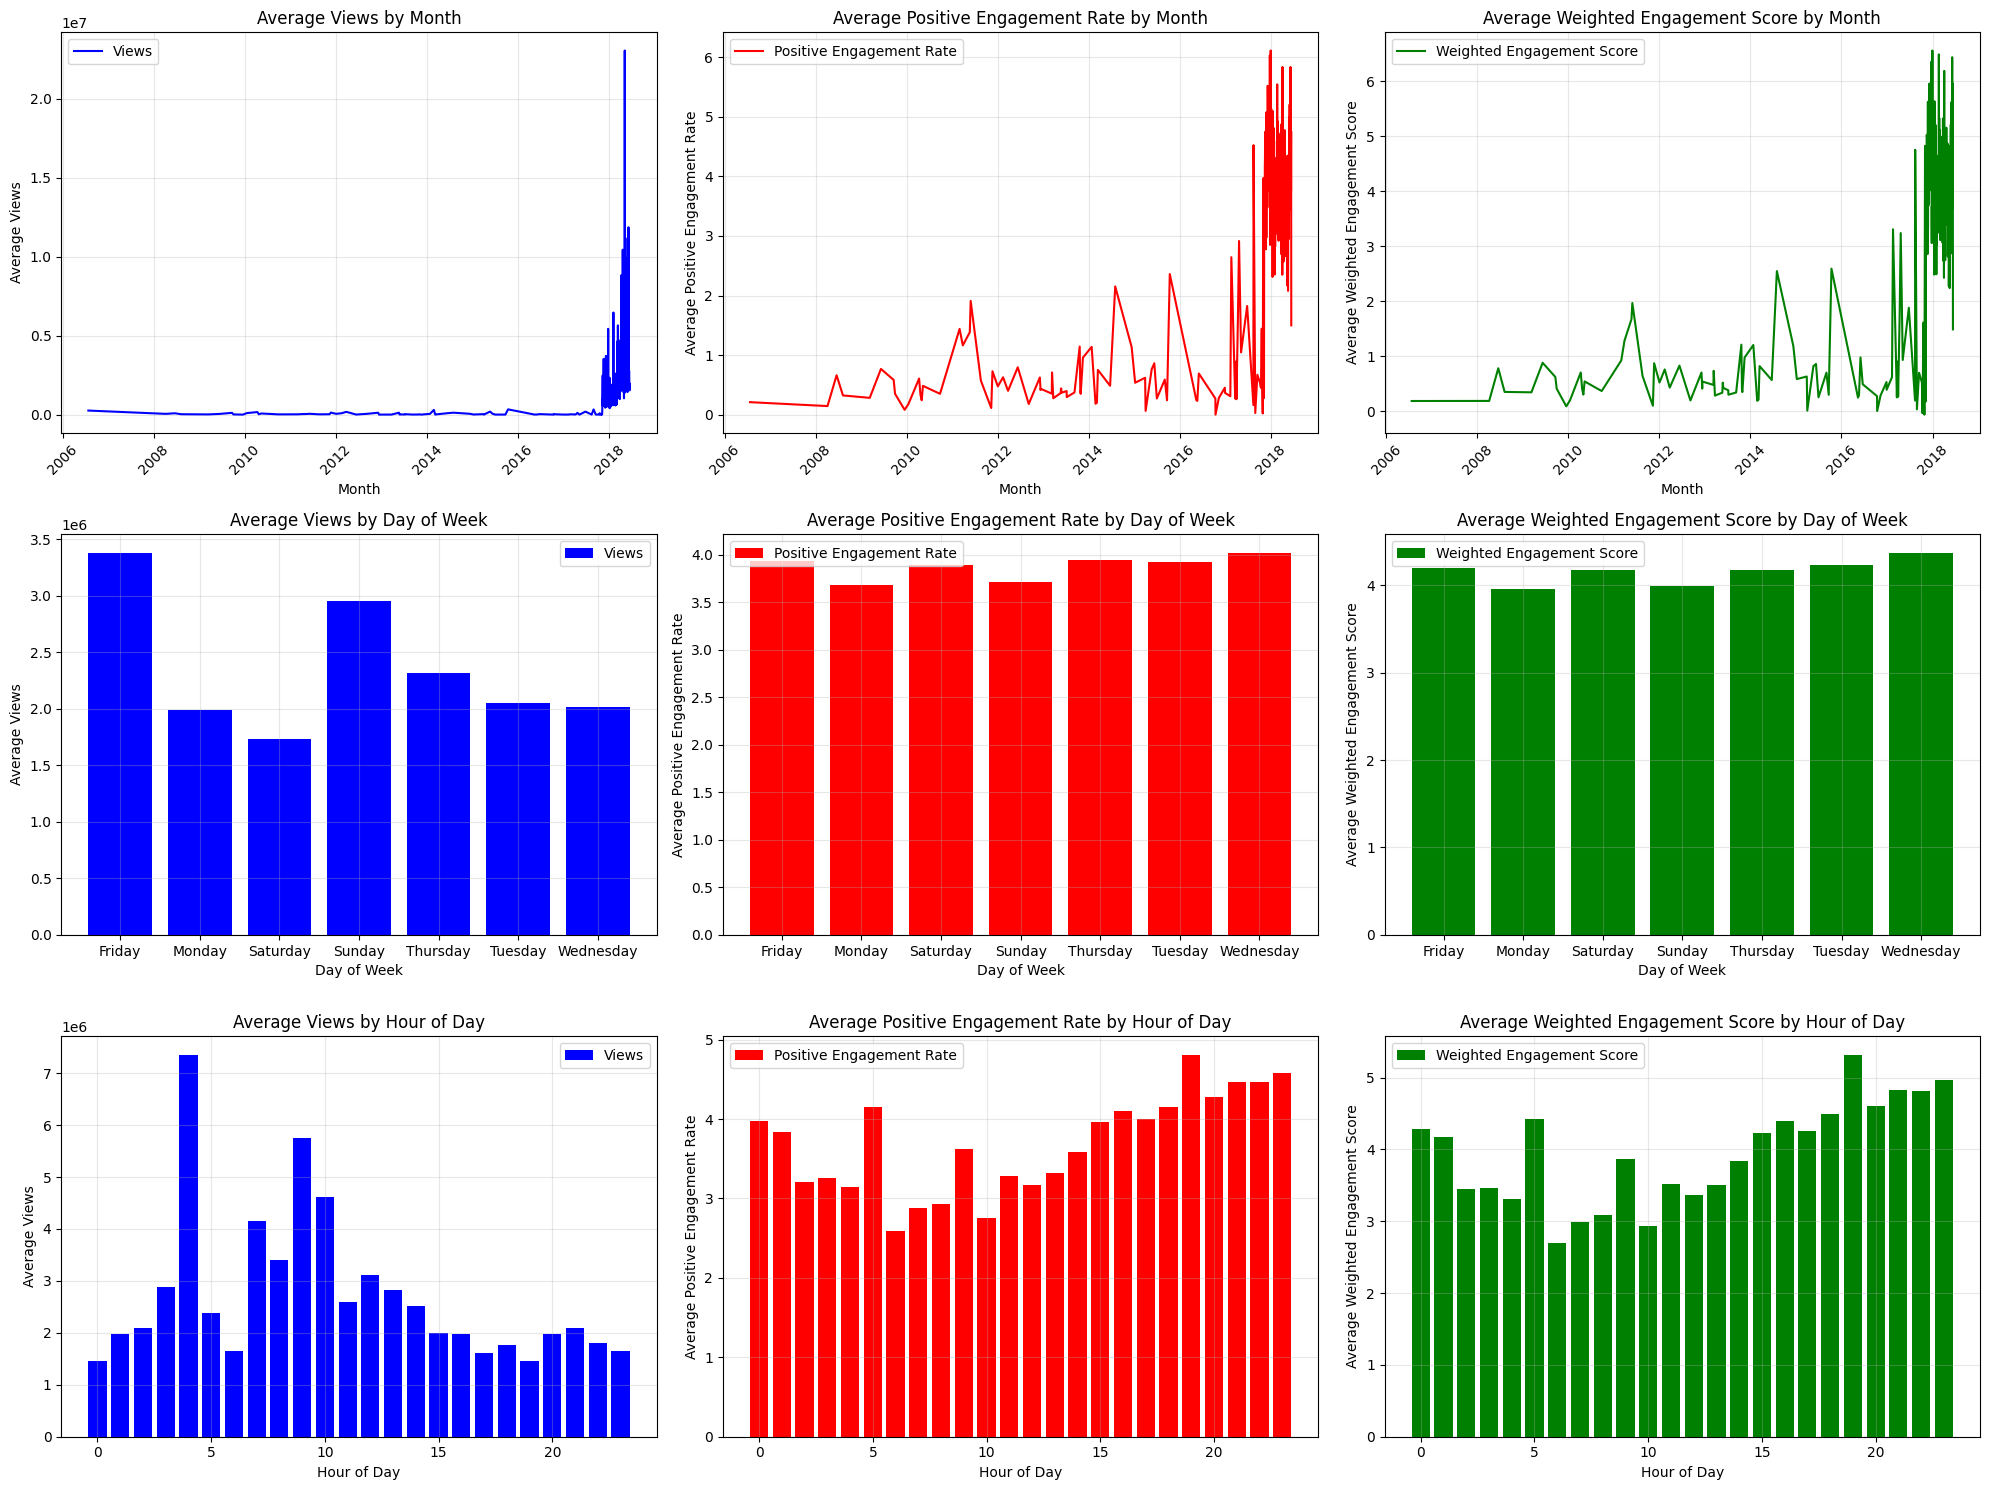

In [45]:
# Create a figure with subplots for different time aggregations
fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # Changed to 3x3 grid

# Define metrics to analyze
metrics = ['views', 'positive_engagement_rate', 'weighted_engagement_score']

# 1. Monthly aggregation
for i, metric in enumerate(metrics):
    monthly_data = df_final.groupby('publish_date')[metric].mean()
    axes[0,i].plot(monthly_data.index, monthly_data.values, label=metric.replace('_', ' ').title(), 
                   color=['blue', 'red', 'green'][i])
    axes[0,i].set_title(f'Average {metric.replace("_", " ").title()} by Month')
    axes[0,i].set_xlabel('Month')
    axes[0,i].set_ylabel(f'Average {metric.replace("_", " ").title()}')
    axes[0,i].tick_params(axis='x', rotation=45)
    axes[0,i].legend()

# 2. Day of week aggregation
for i, metric in enumerate(metrics):
    day_data = df_final.groupby('publish_day')[metric].mean()
    axes[1,i].bar(day_data.index, day_data.values, label=metric.replace('_', ' ').title(),
                  color=['blue', 'red', 'green'][i])
    axes[1,i].set_title(f'Average {metric.replace("_", " ").title()} by Day of Week')
    axes[1,i].set_xlabel('Day of Week')
    axes[1,i].set_ylabel(f'Average {metric.replace("_", " ").title()}')
    axes[1,i].legend()

# 3. Time of day aggregation
for i, metric in enumerate(metrics):
    time_data = df_final.groupby('publish_hour')[metric].mean()
    axes[2,i].bar(time_data.index, time_data.values, label=metric.replace('_', ' ').title(),
                  color=['blue', 'red', 'green'][i])
    axes[2,i].set_title(f'Average {metric.replace("_", " ").title()} by Hour of Day')
    axes[2,i].set_xlabel('Hour of Day')
    axes[2,i].set_ylabel(f'Average {metric.replace("_", " ").title()}')
    axes[2,i].legend()

plt.tight_layout()
plt.show()

In [46]:
# Statistical Analysis
from scipy import stats

def perform_anova(data, group_column, value_column):
    groups = [group for _, group in data.groupby(group_column)[value_column]]
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value

# Create a function to print ANOVA results in a more organized way
def print_anova_results(data, group_column, metrics):
    print(f"\n{group_column.replace('_', ' ').title()} ANOVA Results:")
    print("-" * 50)
    for metric in metrics:
        f_stat, p_value = perform_anova(data, group_column, metric)
        print(f"{metric.replace('_', ' ').title():<25} F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
        print(f"{'':<25} {'Significant' if p_value < 0.05 else 'Not Significant'}")
        print("-" * 50)

# Perform ANOVA tests for all metrics
print("\nANOVA Test Results:")
print("=" * 50)

# For day of week
print_anova_results(df_final, 'publish_day', metrics)

# For time of day
print_anova_results(df_final, 'publish_hour', metrics)

# For month
print_anova_results(df_final, 'publish_date', metrics)

# Additional Analysis: Calculate summary statistics
print("\nSummary Statistics by Time Periods:")
print("=" * 50)


ANOVA Test Results:

Publish Day ANOVA Results:
--------------------------------------------------
Views                     F-statistic: 37.39, p-value: 0.0000
                          Significant
--------------------------------------------------
Positive Engagement Rate  F-statistic: 9.79, p-value: 0.0000
                          Significant
--------------------------------------------------
Weighted Engagement Score F-statistic: 9.98, p-value: 0.0000
                          Significant
--------------------------------------------------

Publish Hour ANOVA Results:
--------------------------------------------------
Views                     F-statistic: 44.90, p-value: 0.0000
                          Significant
--------------------------------------------------
Positive Engagement Rate  F-statistic: 56.81, p-value: 0.0000
                          Significant
--------------------------------------------------
Weighted Engagement Score F-statistic: 59.64, p-value: 0.0000
     

In [47]:
# Function to calculate and display summary statistics
def print_summary_stats(data, group_column, metrics):
    print(f"\n{group_column.replace('_', ' ').title()} Summary Statistics:")
    print("-" * 50)
    for metric in metrics:
        print(f"\n{metric.replace('_', ' ').title()}:")
        stats = data.groupby(group_column)[metric].agg(['mean', 'median', 'std']).round(2)
        print(stats)
        print("-" * 50)

# Calculate summary statistics for all time periods
print_summary_stats(df_final, 'publish_day', metrics)
print_summary_stats(df_final, 'publish_hour', metrics)
print_summary_stats(df_final, 'publish_date', metrics)


Publish Day Summary Statistics:
--------------------------------------------------

Views:
                   mean    median          std
publish_day                                   
Friday       3373693.42  766879.5   9695276.83
Monday       1991127.61  632018.0   5123672.26
Saturday     1729032.77  664561.0   3650120.49
Sunday       2953205.97  863116.0  13559541.00
Thursday     2315076.81  756481.0   5373310.01
Tuesday      2053956.24  620361.5   5581765.63
Wednesday    2017862.05  596095.5   6321770.25
--------------------------------------------------

Positive Engagement Rate:
             mean  median   std
publish_day                    
Friday       3.93    3.15  3.06
Monday       3.68    3.05  2.91
Saturday     3.89    3.28  2.82
Sunday       3.71    2.93  2.81
Thursday     3.94    3.35  2.95
Tuesday      3.93    3.27  3.05
Wednesday    4.02    3.29  3.15
--------------------------------------------------

Weighted Engagement Score:
             mean  median   std
publish_

In [49]:
# Outlier analysis - not usable for the models
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Function to detect outliers using IQR method
def detect_outliers(df_final, column):
    Q1 = df_final[column].quantile(0.25)
    Q3 = df_final[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_final[(df[column] >= lower_bound) & (df_final[column] <= upper_bound)]

# Print outlier statistics
print("\nOutlier Statistics:")
for column in numerical_columns:
    Q1 = df_final[column].quantile(0.25)
    Q3 = df_final[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[column] < lower_bound) | (df_final[column] > upper_bound)]
    print(f"\n{column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df_final))*100:.2f}%")
    print(f"Lower bound: {lower_bound:,.0f}")
    print(f"Upper bound: {upper_bound:,.0f}")


Outlier Statistics:

views:
Number of outliers: 4499
Percentage of outliers: 10.99%
Lower bound: -2,128,913
Upper bound: 4,194,399

likes:
Number of outliers: 5136
Percentage of outliers: 12.54%
Lower bound: -69,566
Upper bound: 130,406

dislikes:
Number of outliers: 5288
Percentage of outliers: 12.91%
Lower bound: -2,402
Upper bound: 4,542

comment_count:
Number of outliers: 5089
Percentage of outliers: 12.43%
Lower bound: -7,098
Upper bound: 13,466
